In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pygal
from datetime import datetime
from sklearn.linear_model import LinearRegression
from scipy.stats import norm
from netCDF4 import Dataset

import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, shiftgrid

sns.set_style("whitegrid")
sns.set_palette("muted")
sns.set_context('notebook', font_scale=1.25, rc={"lines.linewidth": 3})

In [2]:
# Monthly maximum value of daily minimum temperature
ds = Dataset('./data/GHCND_TNx_1951-2019_RegularGrid_global_2.5x2.5deg_LSmask.nc', 'r')

## list ของ เดือน Jan .. Dec

In [29]:
# Jan to Dec
months = list(ds.variables.keys())[3:-1]

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, shiftgrid

# Monthly maximum value of daily minimum temperature
ds = Dataset(
    './data/GHCND_TNx_1951-2019_RegularGrid_global_2.5x2.5deg_LSmask.nc',
    'r')

# list of month Jan .. Dec
months = list(ds.variables.keys())[3:-1]

# base line
baseline_start = 1961
baseline_end = 1991
start_year = 1951
end_year = 2019
start_index = baseline_start - start_year
end_index = baseline_end - start_year
num_baseline_year = baseline_end - baseline_start

# calculate baseline
baseline = 0
for m in months:
    baseline += np.nansum(ds[m][start_index:end_index], axis=0)
# mean of 12 month * num_baseline_year
baseline = baseline/(num_baseline_year*12)
print(f'baseline shape: {baseline.shape}')

# calculate mean of data
data = 0
for m in months:
    data += np.nanmean(ds[m][:], axis=0)
data = data/(12)
print(f'data shape: {data.shape}')

# calculate anomaly
anomaly = data - baseline
print(f'anomaly shape: {anomaly.shape}')

baseline shape: (73, 144)
data shape: (73, 144)
anomaly shape: (73, 144)


c:\users\chuan\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\chuan\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:20: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


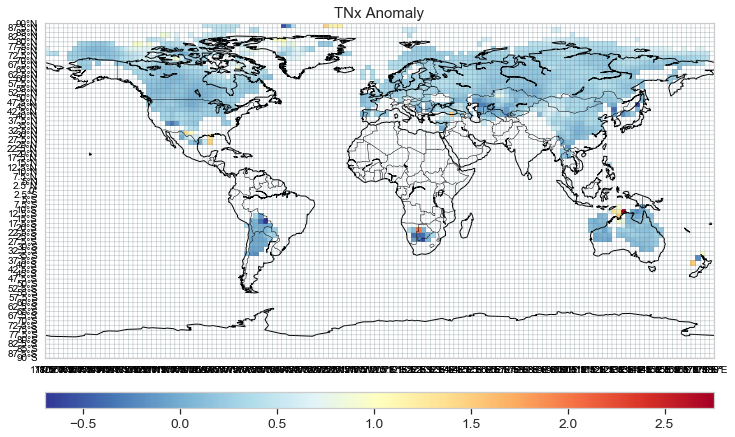

In [42]:
# Visualize map
fig = plt.figure(figsize=(12, 10))
m = Basemap(projection='cyl')
lats = ds['lat']
# lons in dataset is 0..360
lons = ds['lon']

# shifted lon
# lats = np.arange(-90, 92.5, 2.5)
lons = np.arange(-180, 180, 2.5)
anomaly = np.roll(anomaly, int(len(lons)/2 -1), axis=1)

graticule_res = 2.5
parallels = np.arange(min(lats), max(lats)+1, graticule_res)
meridians = np.arange(min(lons), max(lons)+1, graticule_res)
m.drawparallels(parallels,
                labels=[1, 0, 0, 0], color="#62757f", linewidth=0.5)
m.drawmeridians(meridians,
                labels=[1, 0, 0, 1], color="#62757f", linewidth=0.5)
m.drawcountries()
m.drawcoastlines()

x, y = m(*np.meshgrid(lons, lats))
color = m.pcolor(x, y, anomaly.squeeze(), cmap='RdYlBu_r')
m.colorbar(color, location='bottom', pad='10%')
plt.title('TNx Anomaly')
plt.show()


In [41]:
ds['lat'].shape

(73,)

c:\users\chuan\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\chuan\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:21: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


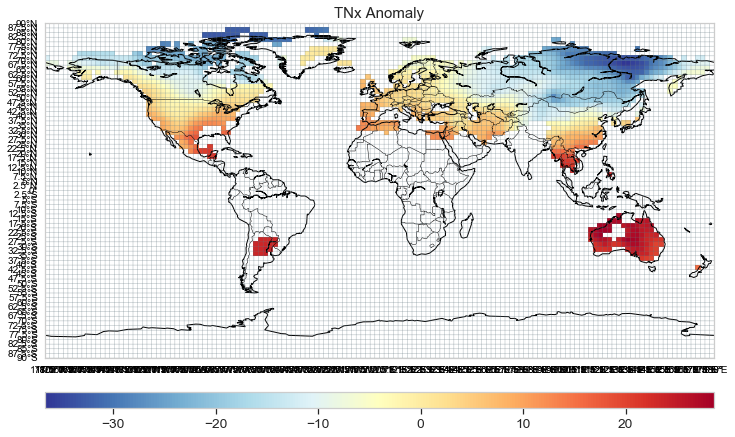

In [46]:
# Visualize map
fig = plt.figure(figsize=(12, 10))
m = Basemap(projection='cyl')
lats = ds['lat']
# lons in dataset is 0..360
lons = ds['lon']

# shifted lon
# lats = np.arange(-90, 92.5, 2.5)
lons = np.arange(-180, 180, 2.5)
data = ds['Jan'][0][:]
anomaly = np.roll(data, int(len(lons)/2)-1)

graticule_res = 2.5
parallels = np.arange(min(lats), max(lats)+1, graticule_res)
meridians = np.arange(min(lons), max(lons)+1, graticule_res)
m.drawparallels(parallels,
                labels=[1, 0, 0, 0], color="#62757f", linewidth=0.5)
m.drawmeridians(meridians,
                labels=[1, 0, 0, 1], color="#62757f", linewidth=0.5)
m.drawcountries()
m.drawcoastlines()

x, y = m(*np.meshgrid(lons, lats))
color = m.pcolor(x, y, anomaly.squeeze(), cmap='RdYlBu_r')
m.colorbar(color, location='bottom', pad='10%')
plt.title('TNx Anomaly')
plt.show()